In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
my_path =r'.\sales_data'
# files = [file for file in os.listdir(my_path) if not file.endswith('1.csv')]
# all_data = pd.read_csv(mypath)
# for file in files:
#     single_sheet= pd.read_csv(my_path+'/Datasets/'+file)
#     all_data = all_data.merge(single_sheet, how='inner', on='Item Code')

In [3]:
# all_data.to_csv(my_path+'/Aggregated Dataset'+'all_data.csv')

In [4]:
df = pd.read_csv(my_path+'/Aggregated Dataset'+'all_data.csv')

In [5]:
df.columns

Index(['Unnamed: 0', 'Item Code', 'Item Name', 'Category Code',
       'Category Name', 'Date', 'Time', 'Quantity Sold (kilo)',
       'Unit Selling Price (RMB/kg)', 'Sale or Return', 'Discount (Yes/No)'],
      dtype='object')

In [6]:
df.drop(columns='Unnamed: 0', inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878503 entries, 0 to 878502
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Item Code                    878503 non-null  int64  
 1   Item Name                    878503 non-null  object 
 2   Category Code                878503 non-null  int64  
 3   Category Name                878503 non-null  object 
 4   Date                         878503 non-null  object 
 5   Time                         878503 non-null  object 
 6   Quantity Sold (kilo)         878503 non-null  float64
 7   Unit Selling Price (RMB/kg)  878503 non-null  float64
 8   Sale or Return               878503 non-null  object 
 9   Discount (Yes/No)            878503 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 67.0+ MB


In [8]:
df.isnull().sum()

Item Code                      0
Item Name                      0
Category Code                  0
Category Name                  0
Date                           0
Time                           0
Quantity Sold (kilo)           0
Unit Selling Price (RMB/kg)    0
Sale or Return                 0
Discount (Yes/No)              0
dtype: int64

In [9]:
df

,Item Code,Item Name,Category Code,Category Name,Date,Time,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Sale or Return,Discount (Yes/No)
0,102900005115168,Niushou Shengcai,1011010101,Flower/Leaf Vegetables,2020-10-30,10:02:13.748,0.743,5.0,sale,No
1,102900005115168,Niushou Shengcai,1011010101,Flower/Leaf Vegetables,2020-10-30,10:48:42.707,0.502,5.0,sale,No
2,102900005115168,Niushou Shengcai,1011010101,Flower/Leaf Vegetables,2020-10-30,11:10:13.023,0.301,5.0,sale,No
3,102900005115168,Niushou Shengcai,1011010101,Flower/Leaf Vegetables,2020-10-30,12:34:32.084,0.382,5.0,sale,No
4,102900005115168,Niushou Shengcai,1011010101,Flower/Leaf Vegetables,2020-10-30,13:33:59.748,0.261,5.0,sale,No
...,...,...,...,...,...,...,...,...,...,...
878498,106973990980123,Hfyg Haixian Mushroom (Bunch),1011010801,Edible Mushroom,2022-07-28,20:26:46.053,1.000,1.5,sale,Yes
878499,106973990980123,Hfyg Haixian Mushroom (Bunch),1011010801,Edible Mushroom,2022-07-28,20:47:51.842,1.000,2.5,sale,No
878500,106973990980123,Hfyg Haixian Mushroom (Bunch),1011010801,Edible Mushroom,2022-07-28,20:48:23.670,1.000,1.5,sale,Yes
878501,106973990980123,Hfyg Haixian Mushroom (Bunch),1011010801,Edible Mushroom,2022-07-29,18:42:16.217,1.000,2.5,sale,No


#### Combining date and time

In [11]:
df['Date/Time'] = df['Date']+' ' +df['Time']

In [12]:
df['Date/Time'] = pd.to_datetime(df['Date/Time'],format='mixed',dayfirst=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878503 entries, 0 to 878502
Data columns (total 11 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   Item Code                    878503 non-null  int64         
 1   Item Name                    878503 non-null  object        
 2   Category Code                878503 non-null  int64         
 3   Category Name                878503 non-null  object        
 4   Date                         878503 non-null  object        
 5   Time                         878503 non-null  object        
 6   Quantity Sold (kilo)         878503 non-null  float64       
 7   Unit Selling Price (RMB/kg)  878503 non-null  float64       
 8   Sale or Return               878503 non-null  object        
 9   Discount (Yes/No)            878503 non-null  object        
 10  Date/Time                    878503 non-null  datetime64[ns]
dtypes: datetime64[ns](1), floa

In [14]:
df['Date/Time']=df['Date/Time'].values.astype('datetime64[s]')

In [15]:
df_temp =df

In [292]:
df.drop(columns = ['Date','Time'],inplace =True)

#### Which category sold the most?

In [18]:
df['Total sales']=df['Quantity Sold (kilo)'] * df['Unit Selling Price (RMB/kg)']

In [19]:
sales_sum = df.groupby('Category Name').sum(numeric_only=True)['Total sales']

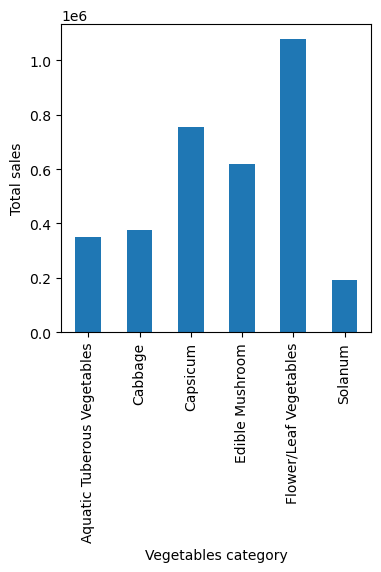

In [245]:
values = [item for item,df in df.groupby('Category Name')]

plt.bar(values, sales_sum, width = 0.5)
plt.xlabel('Vegetables category')
plt.ylabel('Total sales')
plt.xticks(values, rotation = 'vertical', size=10)
plt.show()


#### Most quantity sold

In [22]:
quantity_sum = df.groupby('Category Name').sum(numeric_only=True)['Quantity Sold (kilo)']

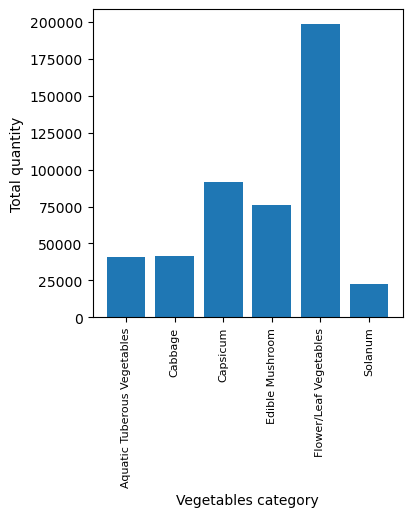

In [249]:
plt.bar(values, quantity_sum)
plt.xlabel('Vegetables category')
plt.ylabel('Total quantity')
plt.xticks(values,rotation='vertical', size=8)
plt.show()

#### Month with the most sales

In [25]:
df['Month'] = df['Date/Time'].dt.month

In [26]:
sales_by_months = df.groupby('Month').sum(numeric_only=True)['Total sales']

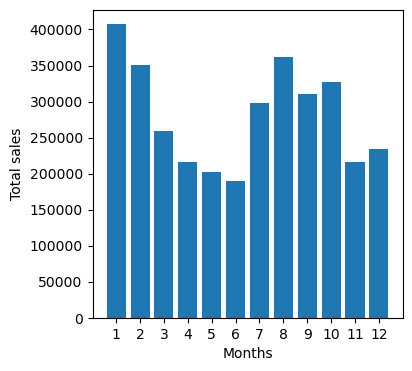

In [251]:
months = [month for month,df in df.groupby('Month')]
plt.bar(months, sales_by_months)
plt.xlabel('Months')
plt.ylabel('Total sales')
plt.xticks(months)
plt.show()

#### Best time for sales

In [29]:
df['Hour'] = df['Date/Time'].dt.hour

In [30]:
sales_by_hours = df.groupby('Hour').sum(numeric_only=True)['Total sales']

In [31]:
hours = [hr for hr,df in  df.groupby('Hour')]

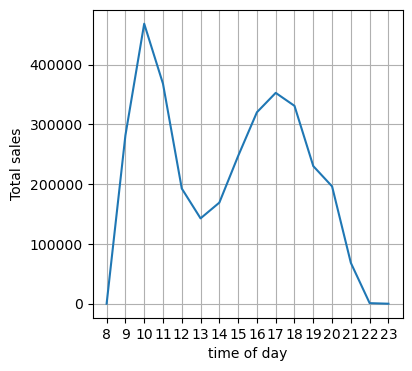

In [264]:
plt.plot(hours,sales_by_hours)
plt.xticks(hours)
plt.xlabel('time of day')
plt.ylabel('Total sales')
plt.grid()

In [325]:
quantity_by_hours = df.groupby('Hour').sum(numeric_only=True)['Quantity Sold (kilo)']

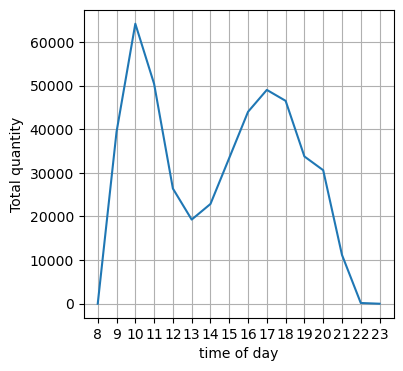

In [327]:
plt.plot(hours,quantity_by_hours)
plt.xticks(hours)
plt.xlabel('time of day')
plt.ylabel('Total quantity')
plt.grid()

#### Effect of discount on sales

In [167]:
discount_sales = df.groupby('Discount (Yes/No)').sum(numeric_only=True)['Total sales'].astype('int64')

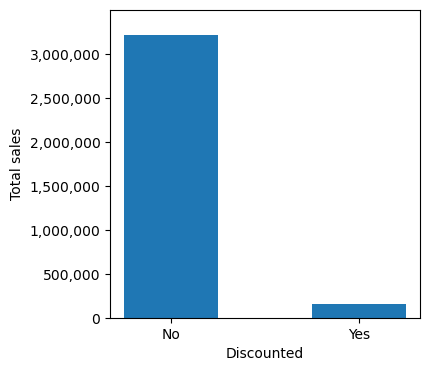

In [260]:
import matplotlib.ticker as mticker
discount = ['No','Yes']
fig, ax = plt.subplots()
ax.bar(discount,discount_sales,width = 0.5)
max_value = 3500000
ticks_loc = np.arange(0, max_value, step=500000)
ax.set_yticks(ticks_loc)
ax.set_ylim([0,max_value])
ax.set_yticklabels(['{:,.0f}'.format(x) for x in ax.get_yticks()])
ax.set_xlabel('Discounted')
ax.set_ylabel('Total sales')
ax.grid(False)
plt.show()

#### Amount ordered and prices of each category

C:\Users\palla\AppData\Local\Temp\ipykernel_19740\867387605.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(values, rotation='vertical', size=8)
C:\Users\palla\AppData\Local\Temp\ipykernel_19740\867387605.py:14: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


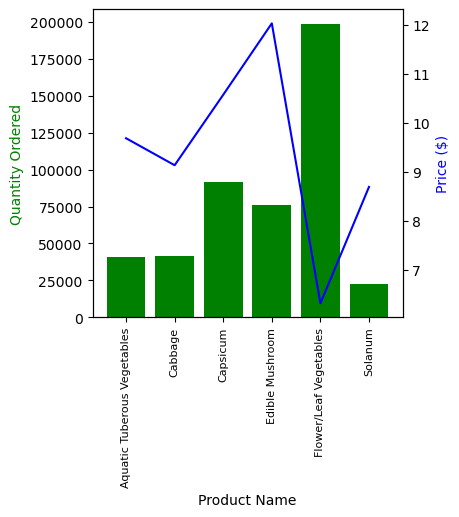

In [320]:
prices = df.groupby('Category Name')['Unit Selling Price (RMB/kg)'].mean()
quantity_ordered = df.groupby('Category Name').sum(numeric_only= True)['Quantity Sold (kilo)']
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(values, quantity_ordered, color='g')
ax2.plot(values, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(values, rotation='vertical', size=8)

fig.show()